In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_regression
import tensorflow as tf

In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Layer, Conv1D, Reshape, Flatten
from keras.utils import plot_model, to_categorical

In [48]:
train_data = pd.read_csv(
    "../data_acquisition/data_0.3/data_game_values_train.csv", sep=";"
)

In [49]:
xg_mean = np.mean(np.mean(train_data["home_xG"]) + np.mean(train_data["away_xG"]))
xg_against_mean = np.mean(
    np.mean(train_data["home_xg_against"]) + np.mean(train_data["away_xg_against"])
)

xt_mean = np.mean(
    np.mean(train_data["home_xT_all"]) + np.mean(train_data["away_xT_all"])
)
xt_against_mean = np.mean(
    np.mean(train_data["home_xt_all_against"])
    + np.mean(train_data["away_xt_all_against"])
)

form_for_mean = np.mean(
    np.mean(train_data["ha_form_home_for"] / 5)
    + np.mean(train_data["ha_form_away_for"] / 5)
)
form_against_mean = np.mean(
    np.mean(train_data["ha_form_home_against"] / 5)
    + np.mean(train_data["ha_form_away_against"] / 5)
)

In [50]:
features = np.swapaxes(
    np.array(
        [
            train_data["home_xG"] - xg_mean,
            train_data["away_xg_against"] - xg_against_mean,
            train_data["away_xG"] - xg_mean,
            train_data["home_xg_against"] - xg_against_mean,
            train_data["home_xT_all"] - xt_mean,
            train_data["away_xt_all_against"] - xt_against_mean,
            train_data["away_xT_all"] - xt_mean,
            train_data["home_xt_all_against"] - xt_against_mean,
        ]
    ),
    0,
    1,
)

# gi = np.swapaxes(np.array([train_data["home_gi"], train_data["away_gi"]]), 0, 1)

form = np.swapaxes(
    np.array(
        [
            (train_data["ha_form_home_for"] / 5) - form_for_mean,
            (train_data["ha_form_home_against"] / 5) - form_against_mean,
            (train_data["ha_form_away_for"] / 5) - form_for_mean,
            (train_data["ha_form_away_against"] / 5) - form_against_mean,
        ]
    ),
    0,
    1,
)

goals = np.swapaxes(
    np.array([train_data["home_score"], train_data["away_score"]]), 0, 1
)

elo_diff = np.swapaxes(
    np.array([(train_data["elo_home"] / 1000) - (train_data["elo_away"] / 1000)]), 0, 1
)

In [51]:
# goals_clas = [np.array([1, 0, 0]) if x[0] > x[1] else np.array([0, 1, 0]) if x[0] == x[1] else np.array([0, 0, 1]) for x in goals]

In [52]:
X = np.concatenate([features, form, elo_diff], axis=1)
y = np.array(goals)

In [53]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(6082, 13, 1)

In [54]:
class ExponentialLayer(Layer):
  def __init__(self, num_outputs):
    super(ExponentialLayer, self).__init__()
    self.num_outputs = num_outputs

  def build(self, input_shape):
    pass
    # self.kernel = self.add_weight("kernel",
    #                               shape=[int(input_shape[-1]),
    #                                      self.num_outputs])

  def call(self, inputs):
    return tf.math.exp(inputs)


In [55]:
model = Sequential()
model.add(Dense(30, input_shape=(13,), activation="relu"))
model.add(Reshape((30,1)))
model.add(Conv1D(20, kernel_size=5))#, data_format="channels_first"))
model.add(Conv1D(20, kernel_size=5))#, data_format="channels_first"))
model.add(Flatten())
# model.add(Reshape((440,)))
# model.add(Dropout(0.25))
# model.add(Dense(512, activation="relu"))
# model.add(Dropout(0.25))
# model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.25))
model.add(Dense(2, activation="linear"))
model.add(ExponentialLayer(2))

In [56]:
# compile the keras model
model.compile(loss="mean_squared_error", optimizer="adam")
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                420       
                                                                 
 reshape_8 (Reshape)         (None, 30, 1)             0         
                                                                 
 conv1d_10 (Conv1D)          (None, 26, 20)            120       
                                                                 
 conv1d_11 (Conv1D)          (None, 22, 20)            2020      
                                                                 
 flatten_3 (Flatten)         (None, 440)               0         
                                                                 
 dense_9 (Dense)             (None, 2)                 882       
                                                                 
 exponential_layer_3 (Expone  (None, 2)               

In [58]:
# fit the keras model on the dataset
model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
609/609 [==============================] - 2s 2ms/step - loss: 1.0517
Epoch 2/100
609/609 [==============================] - 1s 2ms/step - loss: 0.9915
Epoch 3/100
609/609 [==============================] - 1s 2ms/step - loss: 0.9905
Epoch 4/100
609/609 [==============================] - 1s 2ms/step - loss: 0.9836
Epoch 5/100
609/609 [==============================] - 1s 2ms/step - loss: 0.9796
Epoch 6/100
609/609 [==============================] - 1s 2ms/step - loss: 0.9779
Epoch 7/100
609/609 [==============================] - 1s 2ms/step - loss: 0.9730
Epoch 8/100
609/609 [==============================] - 1s 2ms/step - loss: 0.9726
Epoch 9/100
609/609 [==============================] - 1s 2ms/step - loss: 0.9741
Epoch 10/100
609/609 [==============================] - 1s 2ms/step - loss: 0.9708
Epoch 11/100
609/609 [==============================] - 1s 2ms/step - loss: 0.9704
Epoch 12/100
609/609 [==============================] - 1s 2ms/step - loss: 0.9673
Epoch 13/100


In [59]:
# evaluate the keras model
# _, accuracy = model.evaluate(X, y)
# print('Accuracy: %.2f' % (accuracy*100))

In [60]:
test_data = pd.read_csv(
    "../data_acquisition/data_0.3/data_game_values_test_odds.csv", sep=";"
).dropna()

features = np.swapaxes(
    np.array(
        [
            test_data["home_xG"] - xg_mean,
            test_data["away_xg_against"] - xg_against_mean,
            test_data["away_xG"] - xg_mean,
            test_data["home_xg_against"] - xg_against_mean,
            test_data["home_xT_all"] - xt_mean,
            test_data["away_xT_all"] - xt_mean,
            test_data["home_xt_all_against"] - xt_against_mean,
            test_data["away_xt_all_against"] - xt_against_mean,
        ]
    ),
    0,
    1,
)
# features_a = np.swapaxes(np.array([train_data["away_xG"], train_data["away_xT_only_pos"], train_data["home_xg_against"], train_data["home_xt_only_pos_against"]]), 0, 1)

gi = np.swapaxes(np.array([test_data["home_gi"], test_data["away_gi"]]), 0, 1)
# gi_a = np.swapaxes(np.array([train_data["away_gi"]]), 0, 1)

form = np.swapaxes(
    np.array(
        [
            (test_data["ha_form_home_for"] / 5) - form_for_mean,
            (test_data["ha_form_home_against"] / 5) - form_against_mean,
            (test_data["ha_form_away_for"] / 5) - form_for_mean,
            (test_data["ha_form_away_against"] / 5) - form_against_mean,
        ]
    ),
    0,
    1,
)

goals = np.swapaxes(np.array([test_data["home_score"], test_data["away_score"]]), 0, 1)

elo = np.swapaxes(
    np.array([(test_data["elo_home"] / 1000) - (test_data["elo_away"] / 1000)]), 0, 1
)

In [61]:
# goals_clas = [np.array([1, 0, 0]) if x[0] > x[1] else np.array([0, 1, 0]) if x[0] == x[1] else np.array([0, 0, 1]) for x in goals]

In [62]:
X_test = np.concatenate([features, form, elo], axis=1)
y_test = np.array(goals)

In [63]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [64]:
model.evaluate(X_test, y_test)

49/49 [==============================] - 0s 2ms/step - loss: 1.0049


1.0048638582229614

In [65]:
preds = []
for x in range(1000):
    preds.append(model(X_test, training=True))

preds = np.stack(preds)
# preds = preds.astype(int)

In [66]:
predictions_home = np.swapaxes(preds, 0, 1)[:, :, 0]
predictions_away = np.swapaxes(preds, 0, 1)[:, :, 1]

In [67]:
home_std = np.std(predictions_home, axis=1)
away_std = np.std(predictions_away, axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7aa1ec7190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7aa1ec7730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7aa1ec6ec0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7aa1ec7cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7aa1ec7fa0>],
 'means': []}

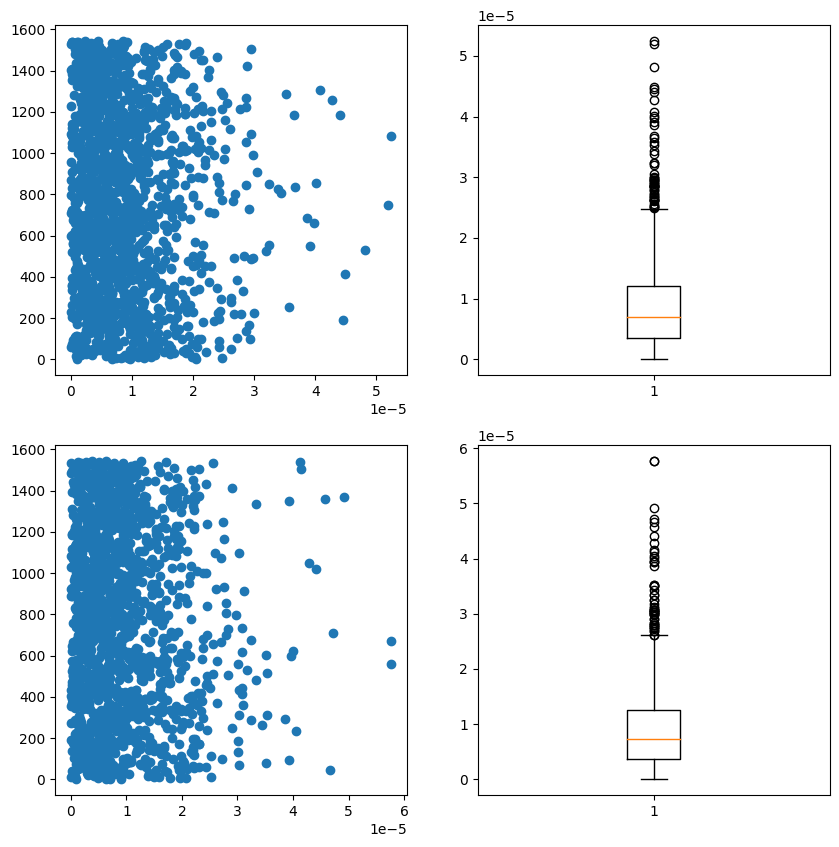

In [68]:
fig, (ax1, ax2) = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
ax1[0].scatter(home_std, np.arange(1545))
ax2[0].scatter(away_std, np.arange(1545))
ax1[1].boxplot(home_std)
ax2[1].boxplot(away_std)

In [69]:
act_res = []
for h, a in y_test:
    act_res.append(f"{str(int(h))}:{str(int(a))}")

predictions_home = np.swapaxes(preds, 0, 1)[:, :, 0]
predictions_away = np.swapaxes(preds, 0, 1)[:, :, 1]

game_quotes = []
most_goals = {"home": [], "away": []}
for game_idx in range(len(predictions_home)):
    game_df = pd.DataFrame(
        {"home": predictions_home[game_idx], "away": predictions_away[game_idx]}
    )
    # home_hist, bin_edges = np.histogram(predictions_home[game_idx], [0,1,2,3,4,5,6])
    # away_hist, bin_edges = np.histogram(predictions_away[game_idx], [0,1,2,3,4,5,6])
    # home, draw, away = 0, 0, 0
    # for i in range(len(home_hist)):
    #     for j in range(len(away_hist)):
    #         if j < i:
    #             home += (home_hist[i]/1000) * (away_hist[j]/1000)
    #         elif j == i:
    #             draw += (home_hist[i]/1000) * (away_hist[j]/1000)
    #         elif j > i:
    #             away += (home_hist[i]/1000) * (away_hist[j]/1000)
    game_df["diff"] = game_df["home"] - game_df["away"]
    home = game_df.loc[game_df["diff"] >= 1].shape[0] / 1000
    draw = (
        game_df.loc[(game_df["diff"] < 1) & (game_df["diff"] > -1)].shape[0] / 1000
    )
    away = game_df.loc[game_df["diff"] <= -1].shape[0] / 1000

    game_quotes.append(f"{round(home, 3)}-{round(draw, 3)}-{round(away, 3)}")
    # most_goals["home"].append(f"h: {np.argmax(home_hist)} - {round(np.max(home_hist)/10)}%")
    # most_goals["away"].append(f"a: {np.argmax(away_hist)} - {round(np.max(away_hist)/10)}%")

# df_res = pd.DataFrame({"actual": act_res, "predicted": game_quotes, "prob goals home" : most_goals['home'], "prob goals away" : most_goals['away']})
df_res = pd.DataFrame(
    {"actual": act_res, "predicted": game_quotes}
)  # , "prob goals home" : most_goals['home'], "prob goals away" : most_goals['away']})
df_cross = pd.DataFrame(
    {
        "actual": [
            0
            if int(df_res.iloc[i]["actual"].split(":")[0])
            > int(df_res.iloc[i]["actual"].split(":")[1])
            else 1
            if int(df_res.iloc[i]["actual"].split(":")[0])
            == int(df_res.iloc[i]["actual"].split(":")[1])
            else 2
            for i in range(df_res.shape[0])
        ],
        "pred": [
            np.argmax([float(y) for y in df_res.iloc[i]["predicted"].split("-")])
            for i in range(df_res.shape[0])
        ],
        "pred_val": [
            np.max([float(y) for y in df_res.iloc[i]["predicted"].split("-")])
            for i in range(df_res.shape[0])
        ],
        "bookie": [
            np.argmax(
                [
                    test_data.iloc[i].bookie_home,
                    test_data.iloc[i].bookie_draw,
                    test_data.iloc[i].bookie_away,
                ]
            )
            for i in range(test_data.shape[0])
        ],
        "bookie_val": [
            np.max(
                [
                    test_data.iloc[i].bookie_home,
                    test_data.iloc[i].bookie_draw,
                    test_data.iloc[i].bookie_away,
                ]
            )
            for i in range(test_data.shape[0])
        ],
    }
)

In [70]:
df_res.head(20)

,actual,predicted
0,1:1,0.0-1.0-0.0
1,1:0,0.0-1.0-0.0
2,2:0,1.0-0.0-0.0
3,2:1,1.0-0.0-0.0
4,0:1,0.0-1.0-0.0
5,2:1,0.0-1.0-0.0
6,1:1,0.0-0.0-1.0
7,2:2,0.0-1.0-0.0
8,1:2,0.0-0.0-1.0
9,2:1,0.0-0.0-1.0


In [71]:
print("Verteilung:")
print(
    f"Anzahl Predicted Home: {df_cross[df_cross['pred'] == 0].shape[0]} ({round(df_cross[df_cross['pred'] == 0].shape[0] / df_cross.shape[0] * 100, 2)}%)",
    end="",
)
print(
    f" | Verteilung Tatsächlich Home: {round(df_cross[df_cross['actual'] == 0].shape[0] / df_cross.shape[0] * 100, 2)}%"
)
print(
    f"Anzahl Predicted Draw: {df_cross[df_cross['pred'] == 1].shape[0]} ({round(df_cross[df_cross['pred'] == 1].shape[0] / df_cross.shape[0] * 100, 2)}%)",
    end="",
)
print(
    f" | Verteilung Tatsächlich Draw: {round(df_cross[df_cross['actual'] == 1].shape[0] / df_cross.shape[0] * 100, 2)}%"
)
print(
    f"Anzahl Predicted Away: {df_cross[df_cross['pred'] == 2].shape[0]} ({round(df_cross[df_cross['pred'] == 2].shape[0] / df_cross.shape[0] * 100, 2)}%)",
    end="",
)
print(
    f" | Verteilung Tatsächlich Away: {round(df_cross[df_cross['actual'] == 2].shape[0] / df_cross.shape[0] * 100, 2)}%"
)
print(
    "---------------------------------------------------------------------------------"
)
print(
    "---------------------------------------------------------------------------------"
)
right, wrong, home_right, draw_right, away_right = 0, 0, 0, 0, 0
home_pred = {"act_away": 0, "act_draw": 0}
draw_pred = {"act_away": 0, "act_home": 0}
away_pred = {"act_home": 0, "act_draw": 0}
for x in range(df_cross.shape[0]):
    if df_cross.iloc[x]["actual"] != df_cross.iloc[x]["pred"]:
        if df_cross.iloc[x]["pred"] == 0:
            if df_cross.iloc[x]["actual"] == 1:
                home_pred["act_draw"] += 1
            else:
                home_pred["act_away"] += 1
        elif df_cross.iloc[x]["pred"] == 1:
            if df_cross.iloc[x]["actual"] == 0:
                draw_pred["act_home"] += 1
            else:
                draw_pred["act_away"] += 1
        else:
            if df_cross.iloc[x]["actual"] == 0:
                away_pred["act_home"] += 1
            else:
                away_pred["act_draw"] += 1
        wrong += 1
    else:
        if df_cross.iloc[x]["actual"] == 0:
            home_right += 1
        elif df_cross.iloc[x]["actual"] == 1:
            draw_right += 1
        else:
            away_right += 1
        right += 1

home_wrong = home_pred["act_away"] + home_pred["act_draw"]
draw_wrong = draw_pred["act_away"] + draw_pred["act_home"]
away_wrong = away_pred["act_home"] + away_pred["act_draw"]
print("Prediction:")
print(
    f"Anzahl Korrekt: {right} ({round(right / df_cross.shape[0] * 100,2)}%), Anzahl Falsch: {wrong} ({round(wrong / df_cross.shape[0] * 100, 2)}%)"
)
print(
    "---------------------------------------------------------------------------------"
)
print(
    f"Anzahl Home Korrekt: {home_right} ({round(home_right / df_cross[df_cross['actual'] == 0].shape[0] * 100, 2)}%), Anzahl Home Falsch: {home_wrong}"
)
print(f"Home Pred. aber Draw --> {home_pred['act_draw']}")
print(f"Home Pred. aber Away --> {home_pred['act_away']}")
print(
    f"Anzahl Draw Korrekt: {draw_right} ({round(draw_right / df_cross[df_cross['actual'] == 1].shape[0] * 100, 2)}%), Anzahl Draw Falsch: {draw_wrong}"
)
print(f"Draw Pred. aber Home --> {draw_pred['act_home']}")
print(f"Draw Pred. aber Away --> {draw_pred['act_away']}")
print(
    f"Anzahl Away Korrekt: {away_right} ({round(away_right / df_cross[df_cross['actual'] == 2].shape[0] * 100, 2)}%), Anzahl Away Falsch: {away_wrong}"
)
print(f"Away Pred. aber Home --> {away_pred['act_home']}")
print(f"Away Pred. aber Draw --> {away_pred['act_draw']}")

Verteilung:
Anzahl Predicted Home: 261 (16.89%) | Verteilung Tatsächlich Home: 42.78%
Anzahl Predicted Draw: 1013 (65.57%) | Verteilung Tatsächlich Draw: 25.5%
Anzahl Predicted Away: 271 (17.54%) | Verteilung Tatsächlich Away: 31.72%
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Prediction:
Anzahl Korrekt: 728 (47.12%), Anzahl Falsch: 817 (52.88%)
---------------------------------------------------------------------------------
Anzahl Home Korrekt: 219 (33.13%), Anzahl Home Falsch: 42
Home Pred. aber Draw --> 30
Home Pred. aber Away --> 12
Anzahl Draw Korrekt: 315 (79.95%), Anzahl Draw Falsch: 698
Draw Pred. aber Home --> 414
Draw Pred. aber Away --> 284
Anzahl Away Korrekt: 194 (39.59%), Anzahl Away Falsch: 77
Away Pred. aber Home --> 28
Away Pred. aber Draw --> 49


In [81]:
home_histograms, away_histograms = [], []
for game_idx in range(len(predictions_home)):
    home_hist, bin_edges = np.histogram(
        np.array(predictions_home[game_idx], dtype=int), [0, 1, 2, 3, 4, 5, 6]
    )
    away_hist, bin_edges = np.histogram(
        np.array(predictions_away[game_idx], dtype=int), [0, 1, 2, 3, 4, 5, 6]
    )
    home_histograms.append(home_hist)
    away_histograms.append(away_hist)

home_cum_hist = np.sum(home_histograms, axis=0)
away_cum_hist = np.sum(away_histograms, axis=0)

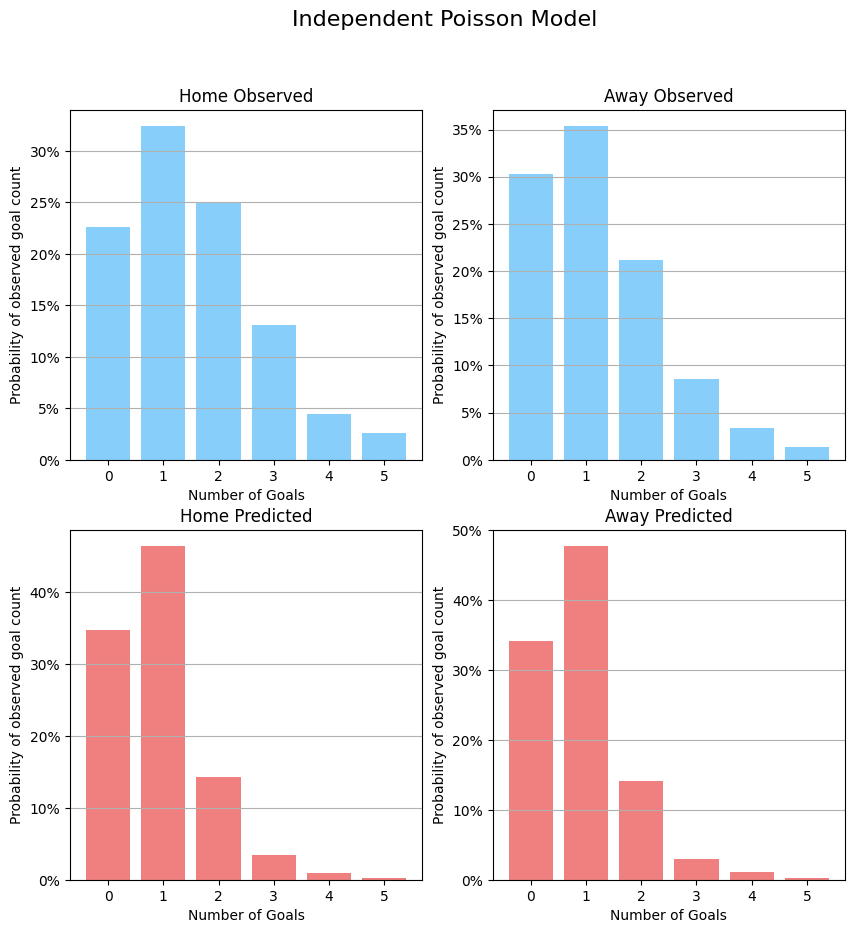

In [82]:
his_h, _ = np.histogram(train_data.home_score, [0, 1, 2, 3, 4, 5, 6])
his_a, _ = np.histogram(train_data.away_score, [0, 1, 2, 3, 4, 5, 6])
fig, (ax1, ax2) = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
fig.suptitle("Independent Poisson Model", fontsize=16)
ax1[0].bar(np.arange(len(his_h)), his_h / np.sum(his_h), color="lightskyblue")
ax1[0].set_title("Home Observed")
ax1[0].set_xlabel("Number of Goals")
ax1[0].set_ylabel("Probability of observed goal count")
ax1[0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x * 100), ",") + "%")
)
ax1[0].grid(axis="y")

ax2[0].bar(
    np.arange(len(home_cum_hist)),
    home_cum_hist / np.sum(home_cum_hist),
    color="lightcoral",
)
ax2[0].set_title("Home Predicted")
ax2[0].set_xlabel("Number of Goals")
ax2[0].set_ylabel("Probability of observed goal count")
ax2[0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x * 100), ",") + "%")
)
ax2[0].grid(axis="y")

ax1[1].bar(np.arange(len(his_a)), his_a / np.sum(his_a), color="lightskyblue")
ax1[1].set_title("Away Observed")
ax1[1].set_xlabel("Number of Goals")
ax1[1].set_ylabel("Probability of observed goal count")
ax1[1].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x * 100), ",") + "%")
)
ax1[1].grid(axis="y")

ax2[1].bar(
    np.arange(len(away_cum_hist)),
    away_cum_hist / np.sum(away_cum_hist),
    color="lightcoral",
)
ax2[1].set_title("Away Predicted")
ax2[1].set_xlabel("Number of Goals")
ax2[1].set_ylabel("Probability of observed goal count")
ax2[1].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x * 100), ",") + "%")
)
ax2[1].grid(axis="y")

In [83]:
print("observed")
print(np.mean(train_data.home_score))
print(np.mean(train_data.away_score))

observed
1.5348569549490299
1.2387372574810918


In [84]:
print(np.sum([x * idx for idx, x in enumerate(home_cum_hist)]) / np.sum(home_cum_hist))
print(np.sum([x * idx for idx, x in enumerate(away_cum_hist)]) / np.sum(away_cum_hist))

0.9035598705501618
0.9003236245954692


Text(0.5, 1.0, 'Predicted')

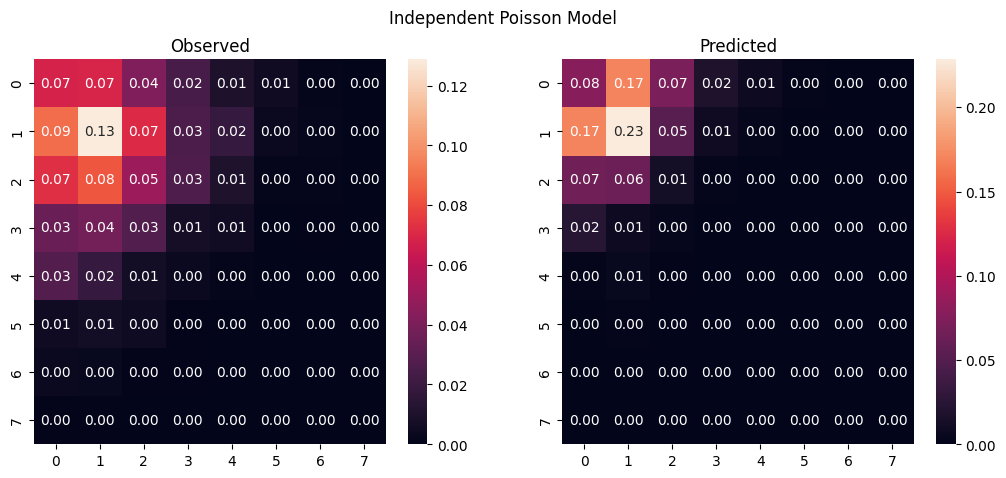

In [85]:
# actual
max_goals = int(np.max(y_test)) + 1
res_table_a = np.array([np.zeros(max_goals) for _ in range(max_goals)])
for h, a in y_test:
    res_table_a[int(h)][int(a)] += 1
res_table_a = res_table_a / test_data.shape[0]

# predicted
max_goals = int(np.max(y_test)) + 1
res_table_p = np.array([np.zeros(max_goals) for _ in range(max_goals)])

game_quotes = []
for game_idx in range(len(predictions_home)):
    home_hist, bin_edges = np.histogram(
        predictions_home[game_idx], [0, 1, 2, 3, 4, 5, 6, 7]
    )
    away_hist, bin_edges = np.histogram(
        predictions_away[game_idx], [0, 1, 2, 3, 4, 5, 6, 7]
    )
    if home_hist.shape[0] < max_goals:
        home_hist = np.append(home_hist, np.zeros(max_goals - home_hist.shape[0]))
    if away_hist.shape[0] < max_goals:
        away_hist = np.append(away_hist, np.zeros(max_goals - away_hist.shape[0]))

    home_hist = home_hist / 1000
    away_hist = away_hist / 1000
    probs = home_hist.reshape(home_hist.shape[0], 1) * away_hist
    probs = probs
    res_table_p += probs

res_table_p = res_table_p / test_data.shape[0]

# sb.heatmap(res_table_p, annot=True)

# top pred result:
max_goals = int(np.max(y_test)) + 1
res_table_pr = np.array([np.zeros(max_goals) for _ in range(max_goals)])

game_quotes = []
for game_idx in range(len(predictions_home)):
    home_hist, bin_edges = np.histogram(
        predictions_home[game_idx], [0, 1, 2, 3, 4, 5, 6, 7]
    )
    away_hist, bin_edges = np.histogram(
        predictions_away[game_idx], [0, 1, 2, 3, 4, 5, 6, 7]
    )
    res_table_pr[np.argmax(home_hist)][np.argmax(away_hist)] += 1
res_table_pr = res_table_pr / test_data.shape[0]
# sb.heatmap(res_table_pr, annot=True)

fig, axes = plt.subplots(1, 2, figsize=(12.5, 5))
fig.suptitle("Independent Poisson Model")
sb.heatmap(ax=axes[0], data=res_table_a, annot=True, fmt=".2f")
axes[0].set_title("Observed")
sb.heatmap(ax=axes[1], data=res_table_p, annot=True, fmt=".2f")
axes[1].set_title("Predicted")

In [86]:
print(np.tril(res_table_a).sum() - np.trace(res_table_a))
print(np.trace(res_table_a))
print(np.triu(res_table_a).sum() - np.trace(res_table_a))

0.4278317152103559
0.25501618122977343
0.31715210355987045


In [87]:
print(np.tril(res_table_p).sum() - np.trace(res_table_p))
print(np.trace(res_table_p))
print(np.triu(res_table_p).sum() - np.trace(res_table_p))

0.3449838187702265
0.3190938511326861
0.33592233009708733


In [88]:
# ece
data_length = df_cross.shape[0]

# acc_model = np.sum(df_cross['actual'] == df_cross['pred']) / data_length
# acc_bookie = np.sum(df_cross['bookie'] == df_cross['actual']) / data_length

# print("Accuracy Model: ", acc_model)
# print("Accuracy Bookie: ", acc_bookie)

# conf_model = np.sum(df_cross['pred_val']) / data_length
# conf_bookie = np.sum(df_cross['bookie_val']/100) / data_length

# print("Confidence Model: ", conf_model)
# print("Confidence Bookie: ", conf_bookie)

# ece_model = np.mean(np.absolute(acc_model - conf_model))
# ece_bookie = np.mean(np.absolute(acc_bookie - conf_bookie))

# print(f"Model ECE: {ece_model}")
# print(f"Bookie ECE: {ece_bookie}")
acc_home = (
    df_cross.loc[(df_cross["bookie"] == 0) & (df_cross["actual"] == 0)].shape[0]
) / df_cross.loc[df_cross["actual"] == 0].shape[0]
acc_draw = (
    df_cross.loc[(df_cross["bookie"] == 1) & (df_cross["actual"] == 1)].shape[0]
) / df_cross.loc[df_cross["actual"] == 1].shape[0]
acc_away = (
    df_cross.loc[(df_cross["bookie"] == 2) & (df_cross["actual"] == 2)].shape[0]
) / df_cross.loc[df_cross["actual"] == 2].shape[0]

conf_home = np.mean(df_cross.loc[(df_cross["bookie"] == 0)].bookie_val / 100)
conf_draw = np.mean(df_cross.loc[(df_cross["bookie"] == 1)].bookie_val / 100)
conf_away = np.mean(df_cross.loc[(df_cross["bookie"] == 2)].bookie_val / 100)
print(acc_home - conf_home)
print(acc_draw - conf_draw)
print(acc_away - conf_away)


acc_home = (
    df_cross.loc[(df_cross["pred"] == 0) & (df_cross["actual"] == 0)].shape[0]
) / df_cross.loc[df_cross["actual"] == 0].shape[0]
acc_draw = (
    df_cross.loc[(df_cross["pred"] == 1) & (df_cross["actual"] == 1)].shape[0]
) / df_cross.loc[df_cross["actual"] == 1].shape[0]
acc_away = (
    df_cross.loc[(df_cross["pred"] == 2) & (df_cross["actual"] == 2)].shape[0]
) / df_cross.loc[df_cross["actual"] == 2].shape[0]

conf_home = np.mean(df_cross.loc[(df_cross["pred"] == 0)].pred_val)
conf_draw = np.mean(df_cross.loc[(df_cross["pred"] == 1)].pred_val)
conf_away = np.mean(df_cross.loc[(df_cross["pred"] == 2)].pred_val)
print(acc_home - conf_home)
print(acc_draw - conf_draw)
print(acc_away - conf_away)

0.2601783491155203
nan
0.06721056586652263
-0.6686838124054463
-0.20050761421319796
-0.6040816326530613


In [89]:
bet_threshold = 10
bets, bets_won, bets_lost = 0, 0, 0
risk, money = 10, 0
for idx, x in df_res.iterrows():
    res = x.actual.split(":")
    result = 0 if res[0] > res[1] else 1 if res[0] == res[1] else 2
    pred = x.predicted.split("-")
    pred_h, pred_d, pred_a = pred[0], pred[1], pred[2]
    bookie_h, bookie_d, bookie_a = (
        test_data.iloc[idx].bookie_home,
        test_data.iloc[idx].bookie_draw,
        test_data.iloc[idx].bookie_away,
    )
    bookie_h_odd, bookie_d_odd, bookie_a_odd = (
        test_data.iloc[idx].bookie_home_odd,
        test_data.iloc[idx].bookie_draw_odd,
        test_data.iloc[idx].bookie_away_odd,
    )
    if (float(pred_h) * 100) - bookie_h > bet_threshold:
        bets += 1
        if result == 0:
            bets_won += 1
            money += risk * (bookie_h_odd) - risk
        else:
            bets_lost += 1
            money -= risk
    if (float(pred_d) * 100) - bookie_d > bet_threshold:
        bets += 1
        if result == 1:
            bets_won += 1
            money += risk * (bookie_d_odd) - risk
        else:
            bets_lost += 1
            money -= risk
    if (float(pred_a) * 100) - bookie_a > bet_threshold:
        bets += 1
        if result == 2:
            bets_won += 1
            money += risk * (bookie_a_odd) - risk
        else:
            bets_lost += 1
            money -= risk

print(f"bets: {bets}")
print(f"won: {bets_won}")
print(f"lost: {bets_lost}")
print("money: ", money)

# bets: 1004
# won: 467
# lost: 537
# money:  6749.102471962487

bets: 1545
won: 728
lost: 817
money:  4356.900000000002
